# Part 7c: Validation
We executed NN inference on the pynq-z2! Now we can copy the `y_hw.npy` back to the host we've been using for the training and synthesis, and make a final plot to check that the output we took on the board is as expected.

The command to copy it back is

```bash
scp xilinx@192.168.2.99:~/jupyter_notebooks/y_hw.npy model_3/
```

Accuracy QKeras, CPU:     0.759644578313253
Accuracy hls4ml, CPU: 0.7593192771084337
Accuracy hls4ml, pynq-z2: 0.7593192771084337


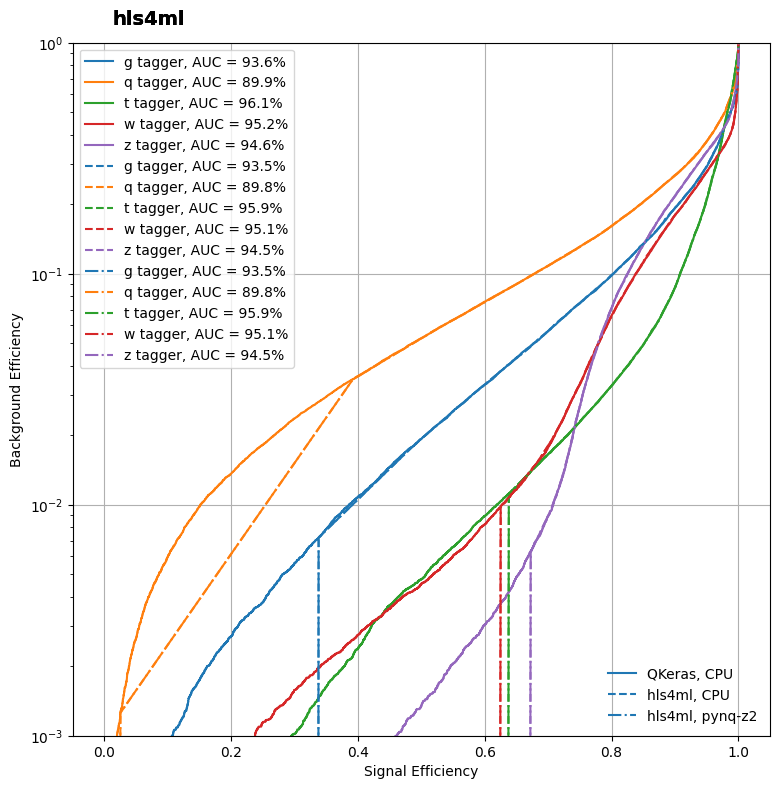

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import plotting

%matplotlib inline
from sklearn.metrics import accuracy_score

y_hw = np.load('model_3/y_hw.npy')
y_test = np.load('y_test.npy')
classes = np.load('classes.npy', allow_pickle=True)
y_hls = np.load('model_3/y_hls.npy')
y_qkeras = np.load('model_3/y_qkeras.npy')

print("Accuracy QKeras, CPU:     {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_qkeras, axis=1))))
print("Accuracy hls4ml, CPU: {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_hls, axis=1))))
print("Accuracy hls4ml, pynq-z2: {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_hw, axis=1))))

fig, ax = plt.subplots(figsize=(9, 9))
_ = plotting.makeRoc(y_test, y_qkeras, classes, linestyle='-')
plt.gca().set_prop_cycle(None)  # reset the colors
_ = plotting.makeRoc(y_test, y_hls, classes, linestyle='--')
plt.gca().set_prop_cycle(None)  # reset the colors
_ = plotting.makeRoc(y_test, y_hw, classes, linestyle='-.')

from matplotlib.lines import Line2D

lines = [Line2D([0], [0], ls='-'), Line2D([0], [0], ls='--'), Line2D([0], [0], ls='-.')]
from matplotlib.legend import Legend

leg = Legend(ax, lines, labels=['QKeras, CPU', 'hls4ml, CPU', 'hls4ml, pynq-z2'], loc='lower right', frameon=False)
ax.add_artist(leg)